# Exploratory Data Analysis

In [ ]:
# Importing all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import jinja2

In [2]:
cleaned_data = pd.read_csv('Data/cleaned_data.csv')
X_trainval = pd.read_csv('Data/X_trainval.csv')

In [3]:
cleaned_data.head()

,ResponseID,ExtendedSessionID,UserID,PedPed,Barrier,CrossingSignal,AttributeLevel,ScenarioTypeStrict,NumberOfCharacters,DiffNumberOFCharacters,...,ICT,Industry_activity,Overall_index,Research_and_development,Skills,Total,Males,Females,Passengers,Pedestrians
0,222HpiEf2LtAwEg62,-1232628507_1597557389,1597557389,0,1,0,Female,Gender,2,0,...,0.50,0.65,0.65,0.5,0.65,13.25,21.75,5.95,7.4120,5.6984
1,222KuWty7pNeiv77a,1654911454_3639764894860440.0,3639764894860440,1,0,0,Low,Social Status,2,0,...,0.65,0.80,1.00,1.0,0.75,12.50,17.85,7.25,3.9603,1.9737
2,222LDp4wz24C3chzj,-1679158262_3623236506.0,3623236506,0,0,0,Fat,Fitness,2,0,...,0.80,0.90,0.90,0.8,0.75,4.20,6.35,2.15,1.9120,0.6120
3,222dZwp7jYt7FrkfQ,781757349_7305361930957958.0,7305361930957960,1,0,0,Male,Gender,1,0,...,0.65,0.80,1.00,1.0,0.75,12.50,17.85,7.25,3.9603,1.9737
4,222fkCAzoe6MAnMsP,-624226515_2260272466.0,2260272466,0,0,0,Female,Gender,1,0,...,0.80,0.90,0.95,0.7,0.85,3.80,5.65,1.95,1.4440,0.3496


## Basic Statistics

In [57]:
pd.set_option('display.max_columns', None)
describe = cleaned_data.describe()
df_describe = pd.DataFrame(describe)
df_describe = df_describe.transpose()
df_describe = df_describe.drop('UserID')
df_describe

,count,mean,std,min,25%,50%,75%,max
PedPed,1405234.0,0.452393,0.497729,0.000,0.000,0.0000,1.0000,1.0000
Barrier,1405234.0,0.273804,0.445910,0.000,0.000,0.0000,1.0000,1.0000
CrossingSignal,1405234.0,0.606614,0.815027,0.000,0.000,0.0000,1.0000,2.0000
NumberOfCharacters,1405234.0,2.905536,1.492411,1.000,1.000,3.0000,4.0000,5.0000
DiffNumberOFCharacters,1405234.0,0.511519,1.100597,0.000,0.000,0.0000,0.0000,4.0000
Saved,1405234.0,0.500000,0.500000,0.000,0.000,0.5000,1.0000,1.0000
Man,1405234.0,0.313294,0.590701,0.000,0.000,0.0000,1.0000,5.0000
Woman,1405234.0,0.313691,0.590701,0.000,0.000,0.0000,1.0000,5.0000
Pregnant,1405234.0,0.058156,0.252500,0.000,0.000,0.0000,0.0000,4.0000
Stroller,1405234.0,0.053505,0.242977,0.000,0.000,0.0000,0.0000,4.0000


## Barplots and Frequency Plots

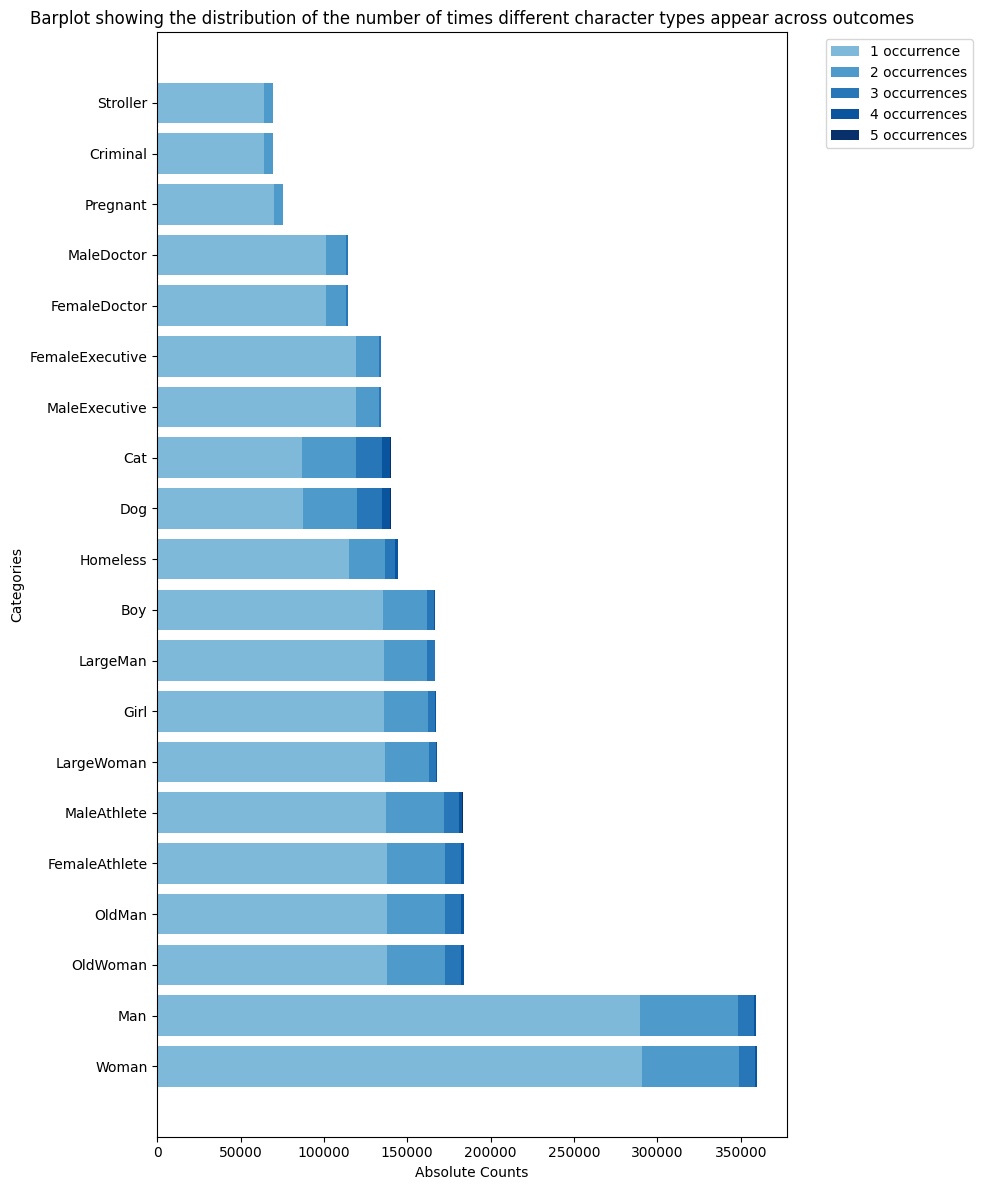

In [4]:
# List of columns to plot
columns = ['Man', 'Woman', 'Pregnant', 'Stroller', 'OldMan', 'OldWoman', 'Boy', 'Girl',
           'Homeless', 'LargeWoman', 'LargeMan', 'Criminal', 'MaleExecutive', 'FemaleExecutive',
           'FemaleAthlete', 'MaleAthlete', 'FemaleDoctor', 'MaleDoctor', 'Dog', 'Cat']

# Create a dictionary to store the counts for each value (1 to 5)
value_counts = {val: [] for val in range(1, 6)}

# Calculate the counts of each value (1 to 5) for each column
for col in columns:
    for val in range(1, 6):
        count = (cleaned_data[col] == val).sum()  # Count how many times 'val' appears in the column
        value_counts[val].append(count)  # Store the absolute count

# Calculate total counts for sorting (sum of counts for values 1 to 5)
total_counts = [sum(value_counts[val][i] for val in range(1, 6)) for i in range(len(columns))]

# Sort columns and value_counts by total_counts
sorted_indices = sorted(range(len(columns)), key=lambda i: total_counts[i])

# Apply sorting to columns and value_counts
sorted_columns = [columns[i] for i in sorted_indices]
sorted_value_counts = {val: [value_counts[val][i] for i in sorted_indices] for val in range(1, 6)}

# Reverse the order to go from short to long
sorted_columns.reverse()
sorted_value_counts = {val: sorted_value_counts[val][::-1] for val in range(1, 6)}

# Create the horizontal stacked bar plot
bar_width = 0.8
fig, ax = plt.subplots(figsize=(10, 12))

# Bottom initialization for stacking
bottom = [0] * len(sorted_columns)

# Define the color gradient
colors = plt.cm.Blues(np.linspace(0.45, 1, 5))  

# Add each segment (for values 1 to 5) to the horizontal bar plot
for val in range(1, 6):
    occurrence_label = 'occurrence' if val == 1 else 'occurrences'  # Set label based on value
    ax.barh(sorted_columns, sorted_value_counts[val], bar_width,
            label=f'{val} {occurrence_label}', left=bottom, color=colors[val - 1])
    
    bottom = [i + j for i, j in zip(bottom, sorted_value_counts[val])]  # Update bottom for stacking

# Add labels and title
ax.set_xlabel('Absolute Counts')
ax.set_ylabel('Categories')
ax.set_title('Barplot showing the distribution of the number of times different character types appear across outcomes')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Place legend outside
plt.tight_layout()

# Show the plot
plt.show()

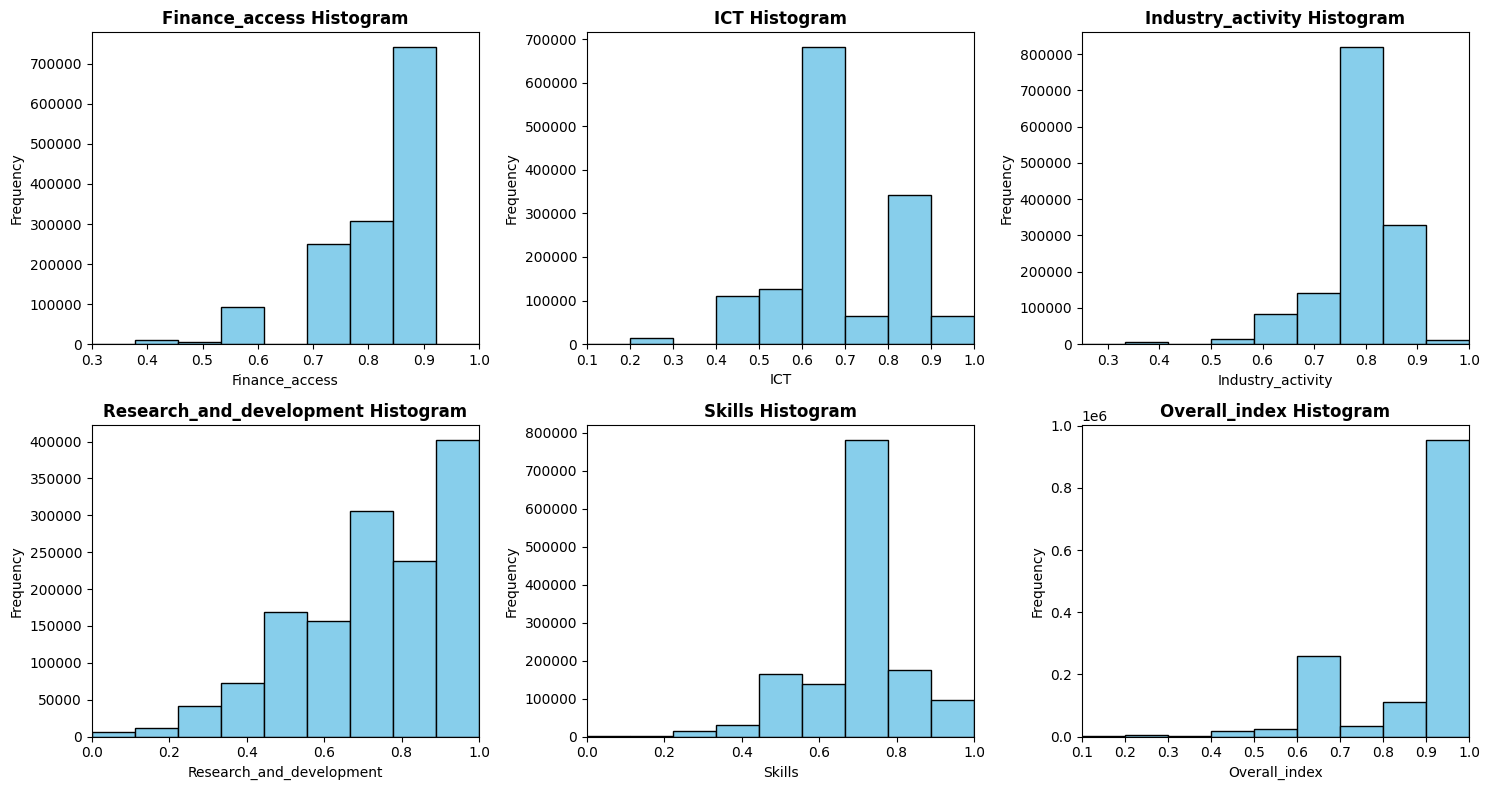

In [ ]:
# Define the columns to plot
columns = ['Finance_access', 'ICT', 'Industry_activity', 'Research_and_development', 'Skills', 'Overall_index']

# Determine the number of rows and columns for subplots
n_cols = 3  
n_rows = -(-len(columns) // n_cols) 

# Create subplots with appropriate size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axs = np.ravel(axs)

# Plot each column
for i, col in enumerate(columns):
    data = cleaned_data[col]
    min_val, max_val = data.min(), data.max()
    bins = np.linspace(min_val, max_val, 10)
    axs[i].hist(data, bins=bins, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{col} Histogram', fontsize=12, fontweight='bold')
    axs[i].set_xlabel(col, fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)
    axs[i].set_xlim(min_val, max_val) 

# Hide any empty subplots if the number of columns exceeds the data
for j in range(len(columns), len(axs)):
    fig.delaxes(axs[j])

# Tighten layout
plt.tight_layout()

# Display the plot
plt.show()

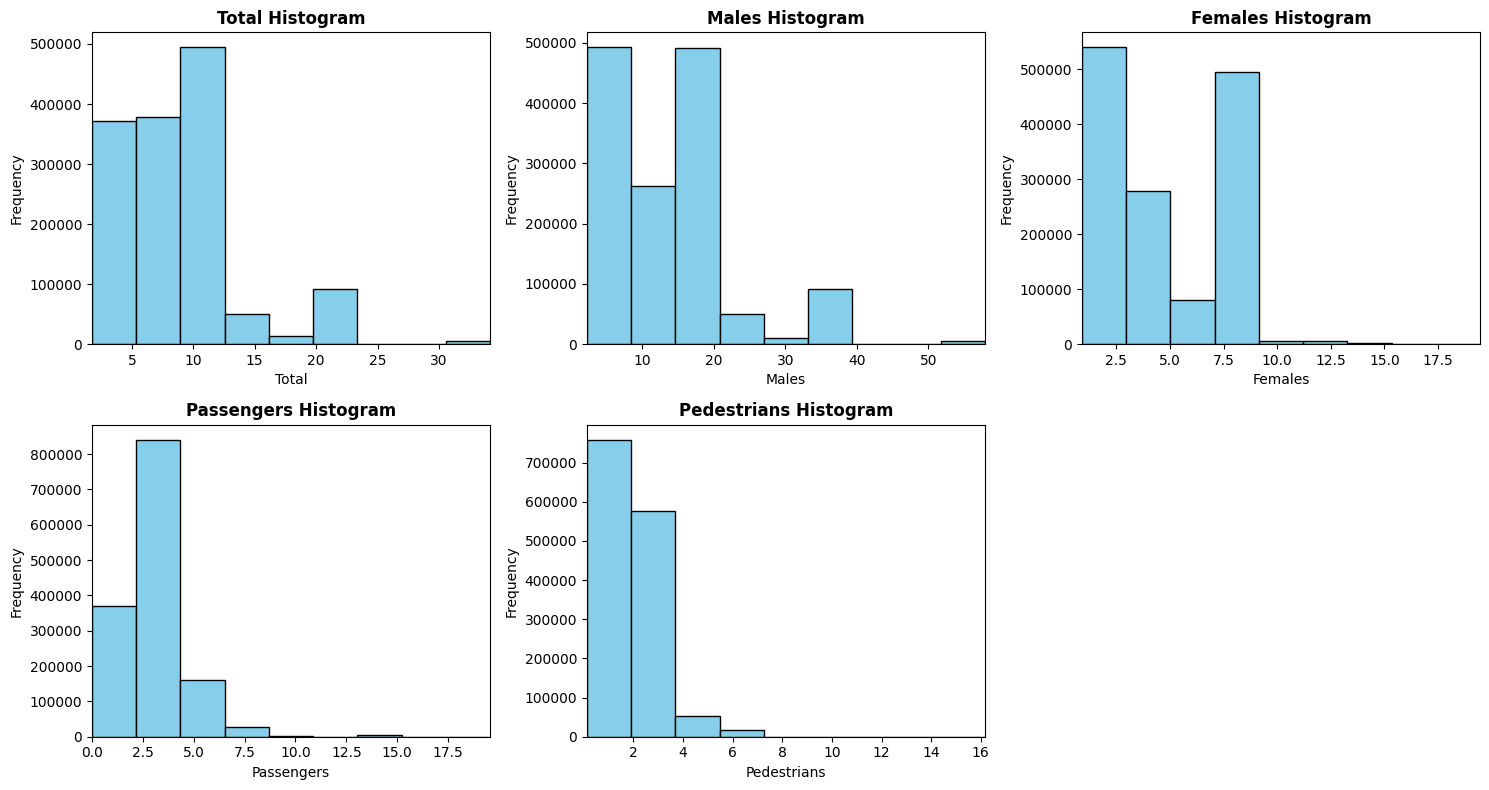

In [ ]:
# Define the columns to plot
columns = ['Total', 'Males', 'Females', 'Passengers', 'Pedestrians']

# Determine the number of rows and columns for subplots
n_cols = 3  
n_rows = -(-len(columns) // n_cols) 

# Create subplots with appropriate size
fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols * 5, n_rows * 4))

axs = np.ravel(axs)

# Plot each column
for i, col in enumerate(columns):
    data = cleaned_data[col]
    min_val, max_val = data.min(), data.max()
    bins = np.linspace(min_val, max_val, 10)
    axs[i].hist(data, bins=bins, color='skyblue', edgecolor='black')
    axs[i].set_title(f'{col} Histogram', fontsize=12, fontweight='bold')
    axs[i].set_xlabel(col, fontsize=10)
    axs[i].set_ylabel('Frequency', fontsize=10)
    axs[i].set_xlim(min_val, max_val)

# Hide any empty subplots if the number of columns exceeds the data
for j in range(len(columns), len(axs)):
    fig.delaxes(axs[j])

# Tighten layout
plt.tight_layout()

# Display the plot
plt.show()


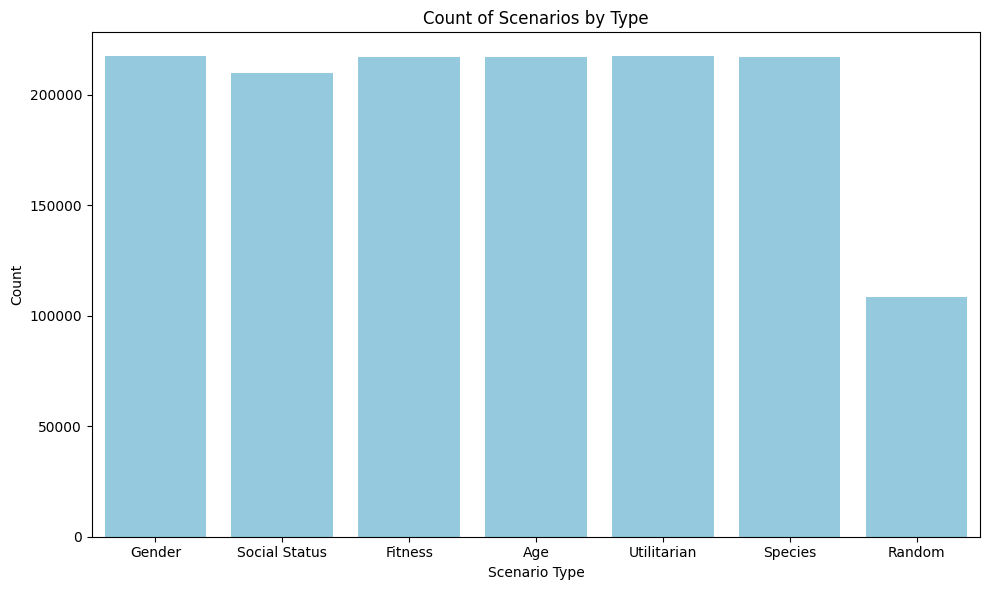

In [ ]:
# Create the countplot
plt.figure(figsize=(10, 6))  
sns.countplot(data=cleaned_data, x='ScenarioTypeStrict', color='skyblue')  
plt.xticks()
plt.title('Count of Scenarios by Type') 
plt.xlabel('Scenario Type')  
plt.ylabel('Count')  
plt.tight_layout() 
plt.show()

/var/folders/1r/syrrrqbj2cgc7y5d1z2fgb3r0000gn/T/ipykernel_11041/4148346647.py:11: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  plt.gca().set_xticklabels(updated_labels)


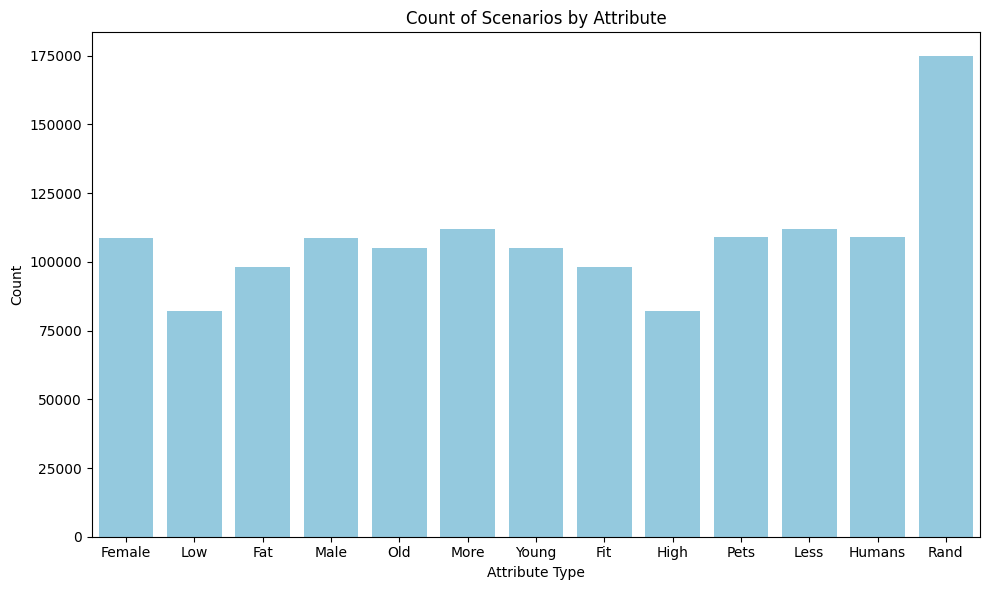

In [ ]:
# Create the countplot
plt.figure(figsize=(10, 6))  
sns.countplot(data=cleaned_data, x='AttributeLevel', color='skyblue')  
plt.title('Count of Scenarios by Attribute')  
plt.xlabel('Attribute Type')  
plt.ylabel('Count')  

# Modify the x-axis tick label Hoomans to Humans
current_labels = [label.get_text() for label in plt.gca().get_xticklabels()]
updated_labels = ['Humans' if label == 'Hoomans' else label for label in current_labels]
plt.gca().set_xticklabels(updated_labels)

plt.tight_layout()
plt.show()

## Correlation Matrix

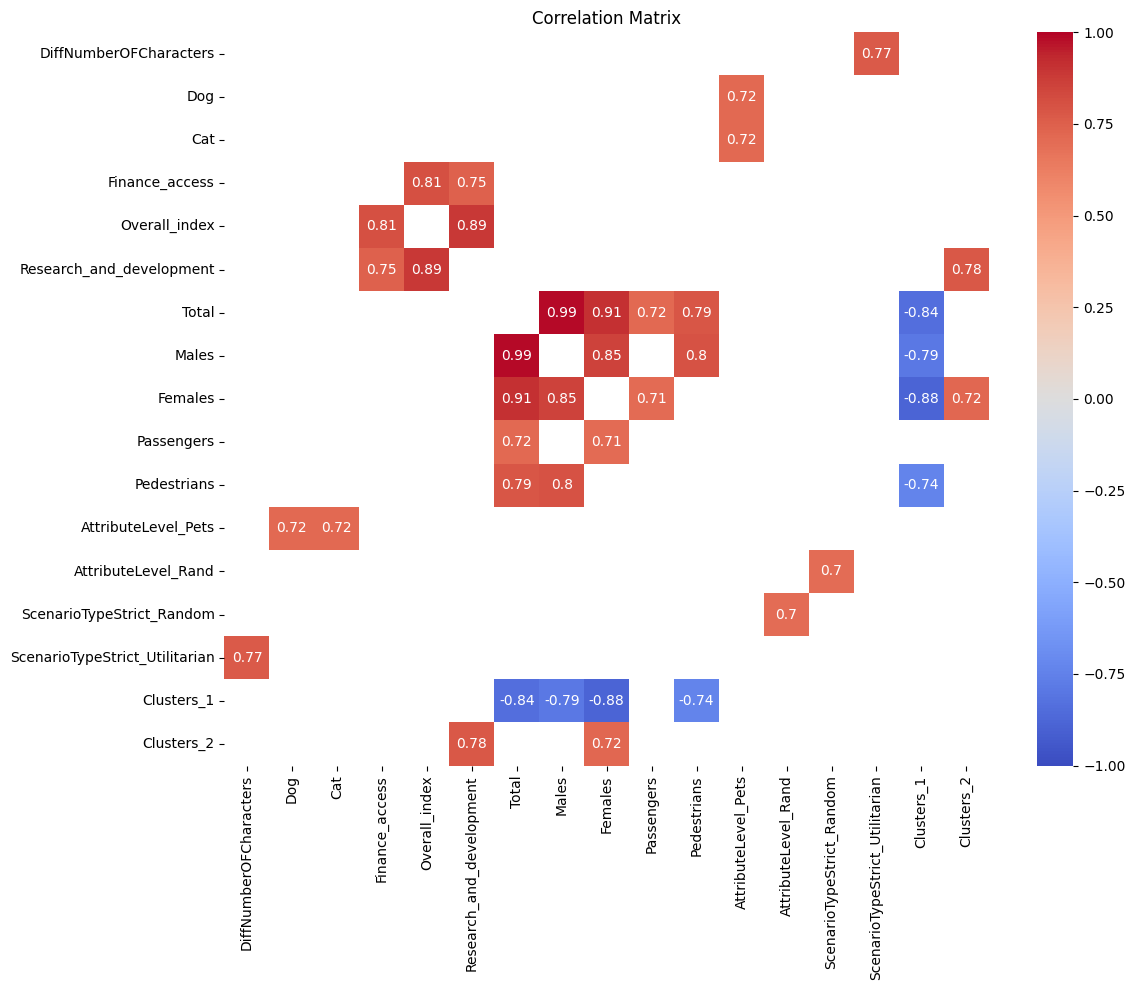

In [5]:
# Correlation matrix for the features in X_trainval
corr_matrix = X_trainval.corr()
corr_matrix

# Only keep values higher than 0.75 or lower than -0.75
high_corr = corr_matrix[((corr_matrix > 0.7) | (corr_matrix < -0.7)) & (corr_matrix != 1.0)]
high_corr = high_corr.dropna(how='all', axis=1).dropna(how='all', axis=0)

# Create a heatmap of high correlations
plt.figure(figsize=(12, 10))
sns.heatmap(high_corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Matrix')
plt.tight_layout()
plt.show()


## Interaction effect

/var/folders/1r/syrrrqbj2cgc7y5d1z2fgb3r0000gn/T/ipykernel_11041/3368852847.py:6: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table1 = df1.pivot_table(
/var/folders/1r/syrrrqbj2cgc7y5d1z2fgb3r0000gn/T/ipykernel_11041/3368852847.py:16: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot_table2 = df2.pivot_table(


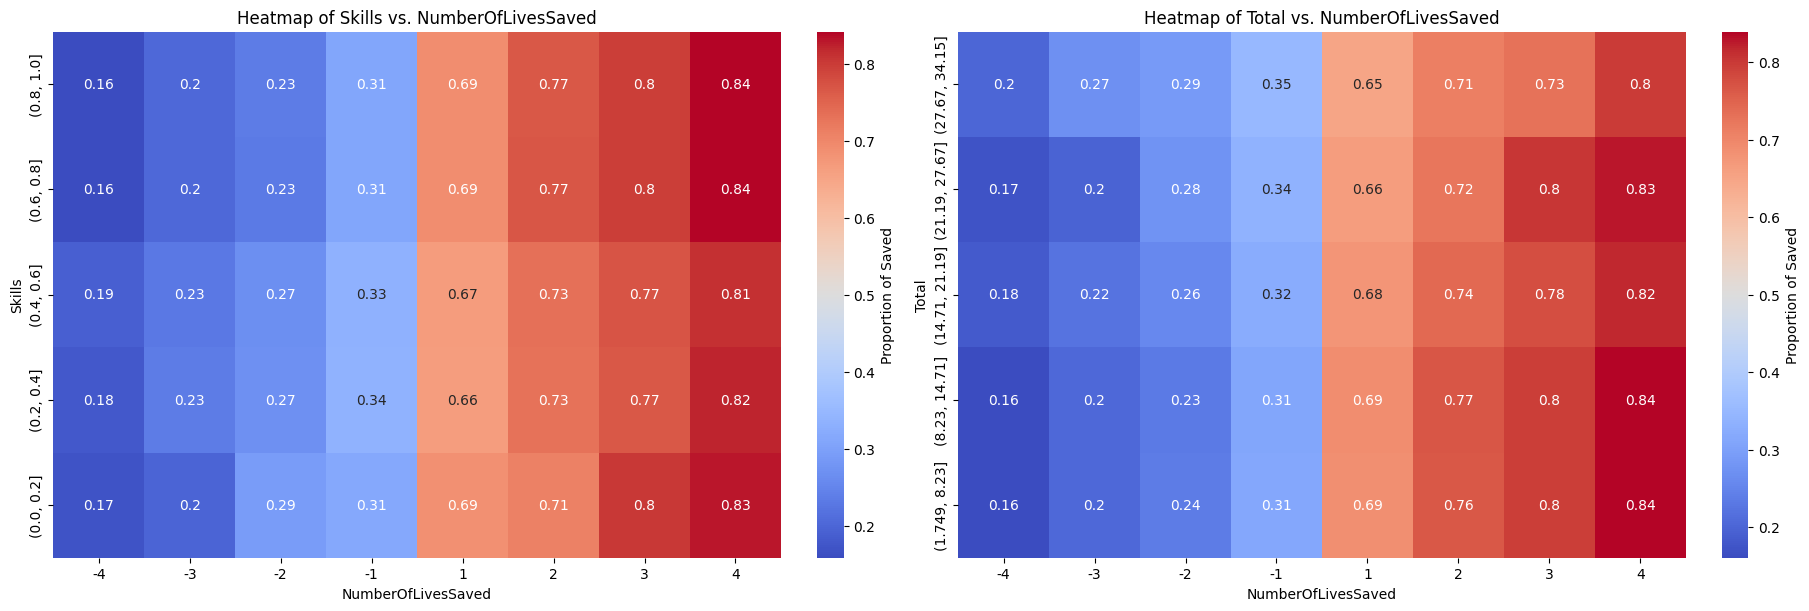

In [84]:
# Load the data
utilitarian_subset = pd.read_csv('Data/utilitarian_subset.csv')

# Heatmap 1: Skills vs. NumberOfLivesSaved and Proportion of Saved
df1 = utilitarian_subset[['NumberOfLivesSaved', 'Skills', 'Saved']]
pivot_table1 = df1.pivot_table(
    values='Saved',
    index=pd.cut(df1['Skills'], bins=np.linspace(df1['Skills'].min(), df1['Skills'].max(), 6)),  # Y-axis bins
    columns='NumberOfLivesSaved',  # X-axis
    aggfunc='mean'  # Aggregation
)
pivot_table1 = pivot_table1.sort_index(ascending=False)

# Heatmap 2: Total vs. NumberOfLivesSaved and Proportion of Saved
df2 = utilitarian_subset[['NumberOfLivesSaved', 'Total', 'Saved']]
pivot_table2 = df2.pivot_table(
    values='Saved',
    index=pd.cut(df2['Total'], bins=np.linspace(df2['Total'].min(), df2['Total'].max(), 6), include_lowest=True),
    columns='NumberOfLivesSaved',
    aggfunc='mean'
)
pivot_table2 = pivot_table2.sort_index(ascending=False)

# Create a grid of plots
fig, axes = plt.subplots(1, 2, figsize=(18, 6), constrained_layout=True)

# Plot Heatmap 1
sns.heatmap(pivot_table1, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Saved'}, ax=axes[0])
axes[0].set_title('Heatmap of Skills vs. NumberOfLivesSaved')
axes[0].set_xlabel('NumberOfLivesSaved')
axes[0].set_ylabel('Skills')

# Plot Heatmap 2
sns.heatmap(pivot_table2, annot=True, cmap='coolwarm', cbar_kws={'label': 'Proportion of Saved'}, ax=axes[1])
axes[1].set_title('Heatmap of Total vs. NumberOfLivesSaved')
axes[1].set_xlabel('NumberOfLivesSaved')
axes[1].set_ylabel('Total')

# Display the plots
plt.show()
